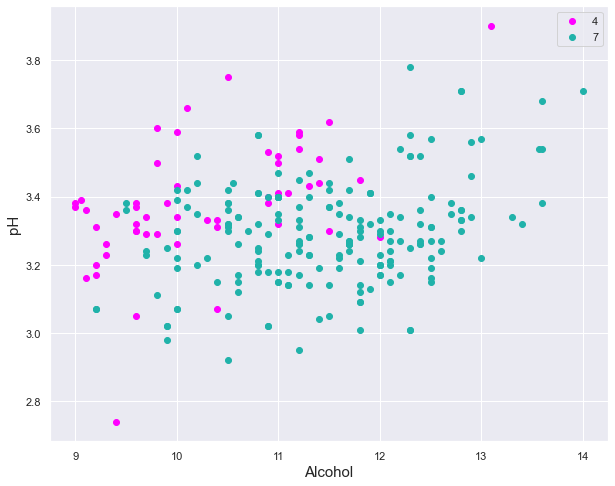

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
wine = pd.read_csv("Datasets/winequality-red4_7.csv")

X = wine[["alcohol", "pH"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y ==4:
        return 0
    else:
        return 1
         
# Create target value array
y = wine["quality"].map(make_labels).to_numpy()

# Plot the data
wine_quality = [4, 7]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for quality, color in zip(wine_quality, colors):
    temp_df = wine[wine.quality == quality]
    ax.scatter(temp_df.alcohol,
               temp_df.pH,
               c = color,
               label = quality, 
               )
    
ax.set_xlabel("Alcohol", fontsize = 15)
ax.set_ylabel("pH", fontsize = 15)
ax.legend()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"AdaBoost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.92      0.48      0.63        25
           1       0.85      0.99      0.91        76

    accuracy                           0.86       101
   macro avg       0.89      0.73      0.77       101
weighted avg       0.87      0.86      0.84       101
 



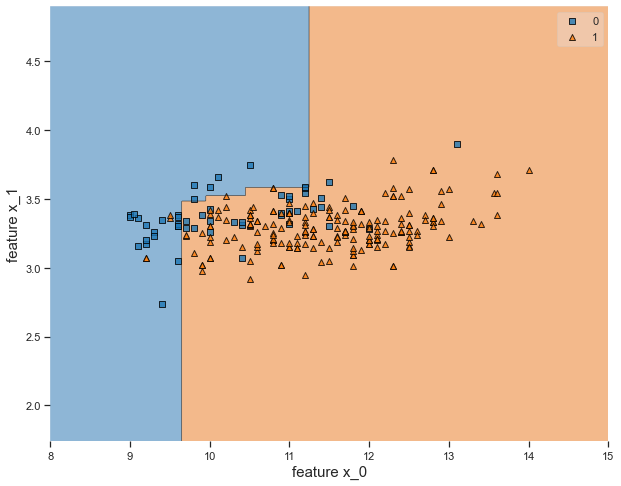

In [6]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = ada_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()


In [8]:
X = wine[["alcohol", "pH", "citric_acid", "volatile_acidity"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")


Tree Classification Report
              precision    recall  f1-score   support

           0       0.94      0.60      0.73        25
           1       0.88      0.99      0.93        76

    accuracy                           0.89       101
   macro avg       0.91      0.79      0.83       101
weighted avg       0.90      0.89      0.88       101
 



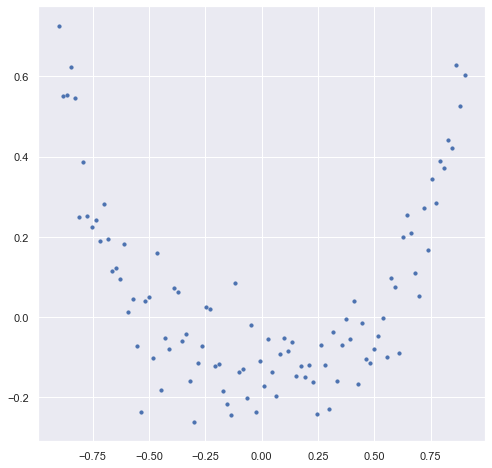

In [9]:
np.random.seed(0)
X = np.linspace(-.9, .9, 100)
y = (X ** 4) + np.random.normal(-.09, .09, 100)
plt.figure(figsize=(8, 8))
plt.scatter(X, y, s=10)
plt.show()


In [10]:
from sklearn.tree import DecisionTreeRegressor

X_new = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_new, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)





tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X_train, y_train)

y2 = y_train - tree_reg1.predict(X_train)

tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X_train, y2)

y3 = y2 - tree_reg2.predict(X_train)

tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X_train, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

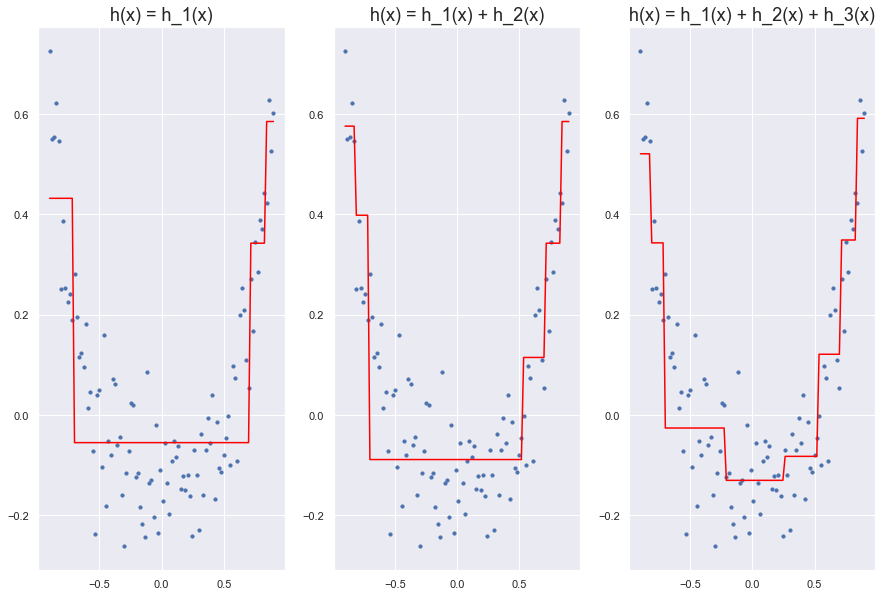

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))

ax1.scatter(X, y, s=10)
ax1.plot(X, tree_reg1.predict(X_new), color = "red")
ax1.set_title("h(x) = h_1(x)", fontsize = 18)

ax2.scatter(X, y, s=10)
ax2.plot(X, tree_reg1.predict(X_new)+tree_reg2.predict(X_new), color = "red")
ax2.set_title("h(x) = h_1(x) + h_2(x)", fontsize = 18)

ax3.scatter(X, y, s=10)
ax3.plot(X, tree_reg1.predict(X_new)+tree_reg2.predict(X_new)+tree_reg3.predict(X_new), color = "red")
ax3.set_title("h(x) = h_1(x) + h_2(x) + h_3(x)", fontsize = 18)
plt.show()

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth = 2, n_estimators = 150, learning_rate=0.2, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_new)

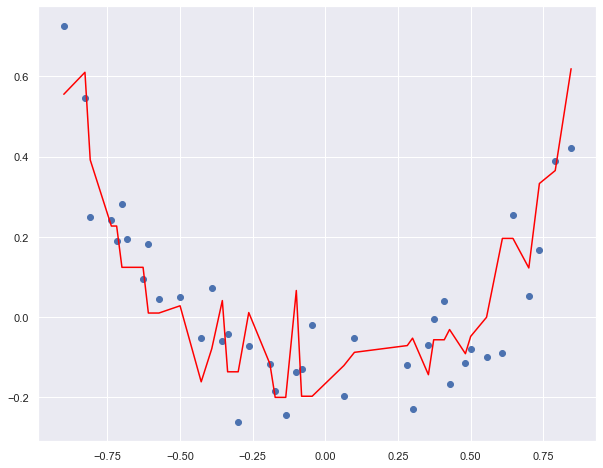

In [13]:
y_pred = gb_reg.predict(X_test)
points = [(x[0], y, z) for x, y, z in zip(X_test, y_pred, y_test)]
points.sort(key = lambda x : x[0])
X_new_test, y_new_pred, y_new_test = np.array([x[0] for x in points]), np.array([x[1] for x in points]), np.array([x[2] for x in points])
X_new_test = X_new_test.reshape(-1, 1)


plt.figure(figsize=(10, 8))
plt.scatter(X_new_test, y_new_test)
plt.plot(X_new_test, y_new_pred, color = "red")
plt.show()